In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#!pip list | grep 'tensorflow'

# **Shallow and Deep Neural Network**

In [3]:
from sklearn.datasets import make_moons

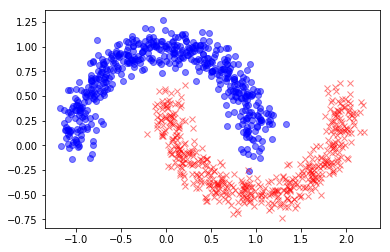

In [4]:
#AM: Creating a fake dataset non linearly separable  
X, y = make_moons(n_samples=1000, noise=0.1, random_state=0)
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)

In [5]:
#AM: We have a fake dataset: 1000 samples with 2 features each.
X.shape

(1000, 2)

In [6]:
#AM: Benchmark (prior probability)
print('P(0):',X[y==0,0].shape[0] /X.shape[0]) 
print('P(1):',X[y==1,0].shape[0] /X.shape[0])

P(0): 0.5
P(1): 0.5


In [9]:
#AM: Split training/test on 70%/30%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train

array([[ 1.76205245, -0.14570237],
       [ 0.55588423, -0.48846328],
       [-0.78700509,  0.29237568],
       ...,
       [ 0.87494615,  0.47891825],
       [ 0.02224454,  1.03198998],
       [ 0.66971953,  0.40652933]])

In [10]:
#AM: Importing the structures to build model.
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam


Using TensorFlow backend.
/home/aldisio/Documents/IFCE/Treineer/LAPISCO/Aulas/Deeplearning/aldisio-materiais-aula-deeplearning/notebooks-deeplearning/.env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/aldisio/Documents/IFCE/Treineer/LAPISCO/Aulas/Deeplearning/aldisio-materiais-aula-deeplearning/notebooks-deeplearning/.env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/aldisio/Documents/IFCE/Treineer/LAPISCO/Aulas/Deeplearning/aldisio-materiais-aula-deeplearning/notebooks-deeplearning/.env/lib/python3.6/site-pac

# **Shallow Model**

In [18]:
#AM: Building shallow model: One Layer with sigmoid function
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [19]:
model.fit(X_train, y_train, epochs=200, verbose=1)

Epoch 1/200
700/700 [==============================] - 0s 133us/step - loss: 0.6987 - accuracy: 0.6486
Epoch 2/200
700/700 [==============================] - 0s 57us/step - loss: 0.3732 - accuracy: 0.8457
Epoch 3/200
700/700 [==============================] - 0s 49us/step - loss: 0.2789 - accuracy: 0.8857
Epoch 4/200
700/700 [==============================] - 0s 50us/step - loss: 0.2509 - accuracy: 0.8857
Epoch 5/200
700/700 [==============================] - 0s 49us/step - loss: 0.2408 - accuracy: 0.8829
Epoch 6/200
700/700 [==============================] - 0s 56us/step - loss: 0.2348 - accuracy: 0.8857
Epoch 7/200
700/700 [==============================] - 0s 56us/step - loss: 0.2342 - accuracy: 0.8829
Epoch 8/200
700/700 [==============================] - 0s 55us/step - loss: 0.2299 - accuracy: 0.8886
Epoch 9/200
700/700 [==============================] - 0s 53us/step - loss: 0.2289 - accuracy: 0.8886
Epoch 10/200
700/700 [==============================] - 0s 52us/step - loss: 0.22

700/700 [==============================] - 0s 50us/step - loss: 0.2253 - accuracy: 0.8886
Epoch 160/200
700/700 [==============================] - 0s 51us/step - loss: 0.2243 - accuracy: 0.8886
Epoch 161/200
700/700 [==============================] - 0s 45us/step - loss: 0.2245 - accuracy: 0.8886
Epoch 162/200
700/700 [==============================] - 0s 49us/step - loss: 0.2254 - accuracy: 0.8900
Epoch 163/200
700/700 [==============================] - 0s 47us/step - loss: 0.2245 - accuracy: 0.8900
Epoch 164/200
700/700 [==============================] - 0s 47us/step - loss: 0.2241 - accuracy: 0.8886
Epoch 165/200
700/700 [==============================] - 0s 50us/step - loss: 0.2251 - accuracy: 0.8886
Epoch 166/200
700/700 [==============================] - 0s 49us/step - loss: 0.2257 - accuracy: 0.8857
Epoch 167/200
700/700 [==============================] - 0s 47us/step - loss: 0.2249 - accuracy: 0.8914
Epoch 168/200
700/700 [==============================] - 0s 49us/step - loss: 

In [20]:
results=model.evaluate(X_test, y_test)

300/300 [==============================] - 0s 69us/step


In [21]:
print('Train ACC: ', results[1])

Train ACC:  0.8433333039283752


In [22]:
# AM: Predict
# AM: Show metrics
from sklearn.metrics import confusion_matrix

def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

y_pred = model.predict(X_test) > 0.5

pretty_confusion_matrix(y_test, y_pred, ['0', '1'])

,Predicted 0,Predicted 1
0,116,21
1,26,137


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       137
           1       0.87      0.84      0.85       163

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



In [24]:
#AM: Ploting decision surface
def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    cc = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    plt.legend(['0', '1'])



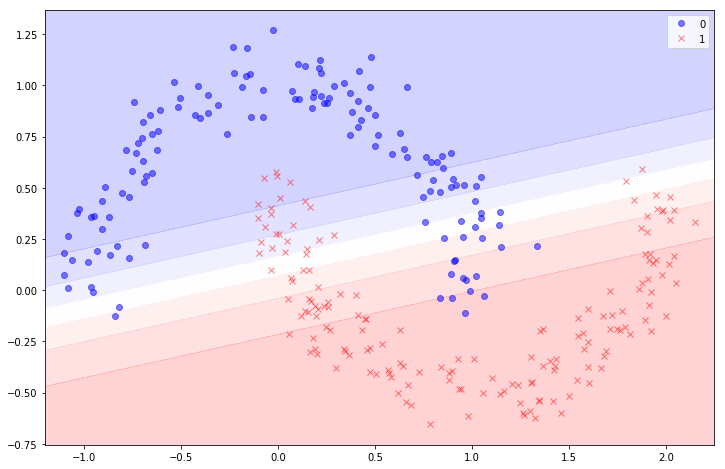

In [25]:
# AM: The shallow model tries a linearly separation
plot_decision_boundary(model, X_test, y_test)

# **Deep Model**

In [26]:
deepModel = Sequential()
deepModel.add(Dense(4, input_shape=(2,), activation='tanh')) #First Layer with 4 neurons
deepModel.add(Dense(2, input_shape=(4,), activation='tanh')) #Second Layer with 2 neurons
deepModel.add(Dense(1, input_shape=(2,), activation='sigmoid')) #Output Layer with sigmoid function
deepModel.compile(optimizer=Adam(lr=0.05), loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
deepModel.fit(X_train, y_train, epochs=200, verbose=1)

Epoch 1/200
700/700 [==============================] - 0s 201us/step - loss: 0.6957 - accuracy: 0.6129
Epoch 2/200
700/700 [==============================] - 0s 63us/step - loss: 0.3874 - accuracy: 0.8543
Epoch 3/200
700/700 [==============================] - 0s 63us/step - loss: 0.2812 - accuracy: 0.8886
Epoch 4/200
700/700 [==============================] - 0s 63us/step - loss: 0.2700 - accuracy: 0.8886
Epoch 5/200
700/700 [==============================] - 0s 63us/step - loss: 0.2676 - accuracy: 0.8900
Epoch 6/200
700/700 [==============================] - 0s 65us/step - loss: 0.2447 - accuracy: 0.8857
Epoch 7/200
700/700 [==============================] - 0s 59us/step - loss: 0.2481 - accuracy: 0.8971
Epoch 8/200
700/700 [==============================] - 0s 65us/step - loss: 0.2321 - accuracy: 0.8857
Epoch 9/200
700/700 [==============================] - 0s 60us/step - loss: 0.2302 - accuracy: 0.8914
Epoch 10/200
700/700 [==============================] - 0s 59us/step - loss: 0.22

700/700 [==============================] - 0s 63us/step - loss: 0.0069 - accuracy: 0.9971
Epoch 160/200
700/700 [==============================] - 0s 66us/step - loss: 0.0119 - accuracy: 0.9971
Epoch 161/200
700/700 [==============================] - 0s 65us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 162/200
700/700 [==============================] - 0s 66us/step - loss: 0.0055 - accuracy: 0.9986
Epoch 163/200
700/700 [==============================] - 0s 60us/step - loss: 0.0091 - accuracy: 0.9986
Epoch 164/200
700/700 [==============================] - 0s 65us/step - loss: 0.0082 - accuracy: 0.9971
Epoch 165/200
700/700 [==============================] - 0s 63us/step - loss: 0.0075 - accuracy: 0.9971
Epoch 166/200
700/700 [==============================] - 0s 63us/step - loss: 0.0130 - accuracy: 0.9957
Epoch 167/200
700/700 [==============================] - 0s 68us/step - loss: 0.0102 - accuracy: 0.9986
Epoch 168/200
700/700 [==============================] - 0s 66us/step - loss: 

In [28]:
deepResults = deepModel.evaluate(X_test, y_test)

300/300 [==============================] - 0s 76us/step


In [29]:
print('Train ACC: ', deepResults[1])

Train ACC:  1.0


In [31]:
# AM: Predict
# AM: Show metrics
y_pred = deepModel.predict(X_test) > 0.5
pretty_confusion_matrix(y_test, y_pred, ['0', '1'])

,Predicted 0,Predicted 1
0,137,0
1,0,163


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       137
           1       1.00      1.00      1.00       163

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



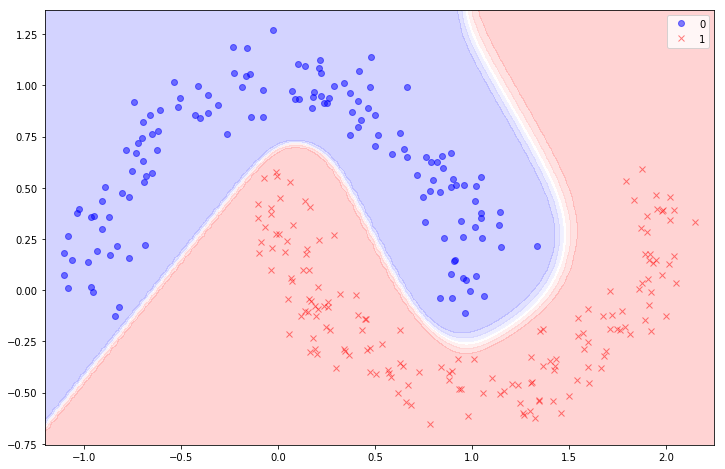

In [33]:
# AM: The deep model achieve a non linearly separation
plot_decision_boundary(deepModel, X_test, y_test)